Number of entries: 2938
Class Distribution:
autistic        1469
non_autistic    1469
Name: labels, dtype: int64


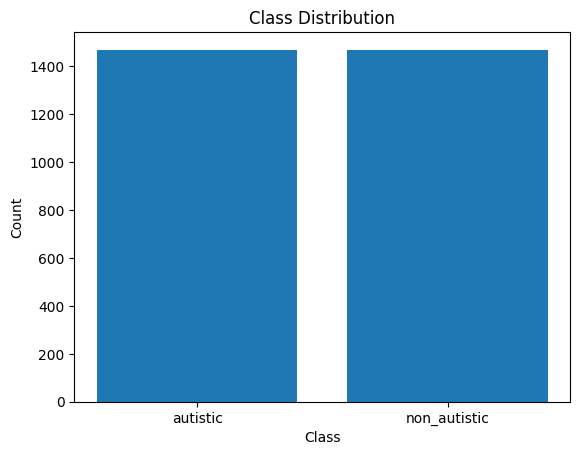

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2
import os, glob
import numpy as np

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/autism.csv')

# Replace 'labels' with the correct column name representing the class labels
labels = dataset['labels']

# Calculate the frequency of each class
class_counts = labels.value_counts()

# Count the number of entries in the dataset
num_entries = len(dataset)

# Display the number of entries and class distribution
print(f"Number of entries: {num_entries}")
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [151]:
SCALER = 1.1 #increase of the output image by this factor wrt recognized face

def resize_folder(input_f, output_f):
    '''resize the images in input_f keeping the ratio height / width
    to be constant according to a picture with lowest area of face in the same folder; 
    the new images are centered on face
    Return: a tuple (height / width)'''
    mtcnn = MTCNN()
    area = 10000000000
    for im in glob.glob(input_f+'/*'):
        image = cv2.imread(im)
        try:
            data = mtcnn.detect_faces(image)
            box = data[0]['box']
            if box[3] * box[2] < area:
                area = box[3] * box[2]
                height, width = box[3], box[2]
        except:
            pass
    ratio = float(height)/float(width)
    for im in glob.glob(input_f+'/*'):
        image = cv2.imread(im)
        try:
            data = mtcnn.detect_faces(image)
            box = data[0]['box']
            #bimg = image[box[1]: box[1]+int(box[3]*SCALER), box[0]: box[0]+int(box[3]*SCALER/ratio)]
            bimg = image[box[1]: box[1]+int(box[2]* SCALER * ratio), box[0]: box[0]+int(box[2]*SCALER)]
            bimg_res = cv2.resize(bimg, (width,height))
            if os.path.exists(output_f) == False:
                os.mkdir(output_f)
            file_name = im.split(input_f)[-1][1:]
            cv2.imwrite(os.path.join(output_f, file_name), bimg_res)
        except:
            print(f"No faces were recognized in image {im.split(input_f)[-1][1:]}")
            
    return (height, width)

In [154]:
SCALER = 1.1 #increase of the output image by this factor wrt recognized face

def resize(im, height, width):
    '''resize the image according to specified height and width
    so that a new image is centered on face
    Return: an np.array or None'''
    mtcnn = MTCNN()
    image = cv2.imread(im)
    ratio = height / width
    try:
        data = mtcnn.detect_faces(image)
        box = data[0]['box']
        bimg = image[box[1]: box[1]+int(box[2]* SCALER * ratio), box[0]: box[0]+int(box[2]*SCALER)]
        bimg_res = cv2.resize(bimg, (width,height))
        return bimg_res
    except:
        print(f"No faces were recognized in image {im.split(input_f)[-1][1:]}")
        return None

In [156]:
input_f='/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic'
output_f='/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/cropp'

height, width = resize_folder(input_f, output_f)

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
No faces were recognized in image 005.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step
No faces were recognized in image 068.jpg
1/1 [==============================] - 0s 17ms/step
No faces were recognized in image 056.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
No faces were recognized in image 006.jpg
1/1 [==============================] - 0s 18ms/step
No faces were recognized in image 001.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
No faces were recognized in image 010.jpg
1/1 [==============================] - 0s 15ms/step
No faces were recognized in image 003.jpg
1/1 [==============================] - 0s 16ms/step
No faces were recognized in image 067.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step
No faces were recognized in image 096.jpg
1/1 [==============================] - 0s 17ms/step
No faces were recognized in image 032.jpg
1/1 [==============================] - 0s 19ms/step
No faces were recognized in image 021.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step
No faces were recognized in image 018.jpg
1/1 [==============================] - 0s 19ms/step
No faces were recognized in image 017.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
No faces were recognized in image 066.jpg
1/1 [==============================] - 0s 20ms/step
No faces were recognized in image 031.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


In [158]:
input_f='/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic'
output_f='/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/cropp'
#height = 150
#width = 150

for im in glob.glob(input_f+'/*'):
    out_im = resize(im, height, width)
    if type(out_im) == np.ndarray:
        if os.path.exists(output_f) == False:
                os.mkdir(output_f)
        file_name = im.split(input_f)[-1][1:]
        cv2.imwrite(os.path.join(output_f, file_name), out_im)

1/1 [==============================] - 0s 69ms/step
No faces were recognized in image 005.jpg
1/1 [==============================] - 0s 52ms/step
No faces were recognized in image 068.jpg
1/1 [==============================] - 0s 53ms/step
No faces were recognized in image 056.jpg
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 91ms/step
No faces were recognized in image 006.jpg
1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image 001.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image 010.jpg
1/1 [==============================] - 0s 141ms/step
No faces were recognized in image 003.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 82ms/step
No faces were recognized in image 067.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image 096.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 70ms/step
No faces were recognized in image 032.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image 021.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 81ms/step
No faces were recognized in image 018.jpg
1/1 [==============================] - 0s 97ms/step
No faces were recognized in image 017.jpg
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image 066.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image 031.jpg
1/1 [==============================] - 0s 101ms/step
